## Fun with prices exploring!!!

In [84]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51736 entries, 0 to 51735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   space_url         51736 non-null  object 
 1   venue_url         51736 non-null  object 
 2   venue_name        51736 non-null  object 
 3   space_name        51736 non-null  object 
 4   latitude          51736 non-null  float64
 5   longitude         51736 non-null  float64
 6   day_of_week       51736 non-null  object 
 7   pricing_period    51736 non-null  object 
 8   time_from         51736 non-null  float64
 9   time_to           51736 non-null  float64
 10  time_period       51736 non-null  float64
 11  total_price       51736 non-null  float64
 12  price_type        51736 non-null  object 
 13  rent_price_split  2434 non-null   float64
 14  min_spend_split   0 non-null      float64
 15  per_person_split  2434 non-null   float64
dtypes: float64(9), object(7)
memory usage: 6

Improvements: 
- Number of price types per venue i.e. typical and is there one thats usually available? Whats the crossover? 
- Get sense of weekly relevance i.e. pricing usually same every weekday? Or different on certain days?

Ideas: 
- Repeat same analysis as above but include weekdays i.e. use index of url + weekday and if the chart is similar shape to above (similar %) then weekdays probably dont change pricing fit? Or do one per week day and compare? Yes that sounds better...
- Is price type typically uniform for all spaces within a venue or varies per room? 
- price variation per week - Do pivot chart with space url and price type as index and columns as the weekdays! then can easily do stand deviation to see which ones don't vary! 


- For weekday differences, perhaps plot bar plots or historams, split by pruce type i.e. new chart poer price type, done per weekday (colored by weekday) and see if they all look similar? 
- or for weekdays -> Do groupby standard deviation of total price across weekdays per space and price type -> std is 0 if prices dont vary accross weekdays. Can get average? Or simply do binary check of how many actually vary at all? Per perice type? Thats a good start! yep, start with that, how many even vary...then go from there :) e.g. how much variation? What days in particualr (maybe distribution graphs or median calculations become useful :) 


Next steps: 
- Weekday analysis (pivot table) 
- investigate Hire Fee and Hire Fee per Hour -> relationship? in breakdown, they are often combined and so can directly calculate...
- Can per person be sensibly converted to min spend or hire fee? How / why? hmmm....? 
- Conversion analysis -> Use Crossover Analysis of price types, is there a sensible correlation? Is it worth doing a simple OLS model to figure out conversion? 
- Discuss finding and ideas with Tara
- Consider options and how you could use final models to prove if conversion makes sense...
- Post question on facebook / forum :) 

Options: 
- Simplest -> Hire Fee only, Min Spend Only models -> maybe per person...but do we even need that? 
- Then after making individual models, see if I can prove via models that there is a better combination e.g.: 
  - The regression models have clear linear regression conversion caluclation e.g. divide by x and multiply by y
  - the combined regression model (using some conversion calculation) is better than without (is that legit...or confused?) 
  - See stuff below e.g. Domain knowledge etc. and what Tara and luke want it for...


- Single model for all price types with dodgy conversions 
- use 'price_type' as categorical variable...but will it be good enough to change regression? In tree model maybe...in regression probably not with any encoding...but maybe I should review total cost per price_type and see if I can see a sensible conversion?  
- Something in between? 
- For all of the above...how to confirm your suspicions? 
  - Domain knowledge? 
  - Or can you make separate and combined models and test which is less error?
  - Do you look and see if the models are similar in shape and that tells you how you can convert from one to another (e.g. if Y = 2x + 4 snd Y' = 4x + 4 then clearly you double y yo get y'....but I want to calculate just using minimum spend from number of people...maybe I model both and see if there is an abvious way to make omne the other....hmmmm....
  - Can you optimise the formula for converting from one to another e.g. after making the models? 
  - Can you use overlaps between pricing types to calculate / test conversion approach?   
- Weekdays or no? Add average value for weekends? 

## Exploring Price Type
Below we remove the weekday data by removing duplicates on the space_url and price_type columns. In the resulting dataset, each space will contribute one row per price type it uses e.g. if a space uses 3 price types, then in the dataset it will have 3 rows, one for each price type. We perform a simple value count showing the percentage frequency of each price_type in the data:

In [85]:
price_types_per_space = prices[['space_url','price_type']].drop_duplicates()

price_types_per_space['price_type'].value_counts(True)*100

hire fee                 32.073628
min. spend               30.200358
hire fee per hour        18.211435
per person               15.702883
hire fee + min. spend     3.420753
hire fee + per person     0.390943
Name: price_type, dtype: float64

The above data is for all spaces in all venues. We would also like to see how the price type is broken down between venues i.e. ignoring differences in price type between different spaces in a venue. To do this, we  will remove duplicates on the **venue_url** and **price_type** columns. In the resulting dataset, each venue will contribute one row per price type it uses e.g. if across all 4 spaces of a venue, the venue used 3 price types, then in the dataset it will have 3 rows, one for each price type. 

In [86]:
price_types_per_venue = prices[['venue_url','price_type']].drop_duplicates()

price_types_per_venue.price_type.value_counts(True)*100

min. spend               31.601563
hire fee                 29.609375
hire fee per hour        21.914062
per person               12.421875
hire fee + min. spend     3.984375
hire fee + per person     0.468750
Name: price_type, dtype: float64

Based on the above breakdowns, we can see that the combined price types ('hire fee + min. spend' and 'hire fee + per person') are very rare, only accounting for ~4.5% of the data. We can also see that minimum spend and hire fee are the most popular price types. The frequency breakdowns of price type are very similar on a per space basis and on a per venue basis, suggesting that venues typically use the same price types for all their spaces. 

Below we repeat the same breakdowns but this time showing the raw counts: 

In [87]:
price_types_per_space['price_type'].value_counts()

hire fee                 1969
min. spend               1854
hire fee per hour        1118
per person                964
hire fee + min. spend     210
hire fee + per person      24
Name: price_type, dtype: int64

In [88]:
price_types_per_venue.price_type.value_counts()

min. spend               809
hire fee                 758
hire fee per hour        561
per person               318
hire fee + min. spend    102
hire fee + per person     12
Name: price_type, dtype: int64

In [89]:
price_types_per_venue.price_type.count()

2560

**Thoughts:**
- The top 3 price types each have over 1000 observations, so offer a good amount of data to model with as separate regression models. 

In [90]:
table = pd.pivot(price_types_per_space, index=['space_url'],
                    columns=['price_type'], values = ['price_type'])
table

price_type  ...            
price_type                                           hire fee  ...  per person
space_url                                                      ...            
https://www.tagvenue.com/rooms/barnes/7039/the-...        NaN  ...  per person
https://www.tagvenue.com/rooms/barnes/7040/the-...        NaN  ...  per person
https://www.tagvenue.com/rooms/barnes/7041/the-...        NaN  ...  per person
https://www.tagvenue.com/rooms/barnet/8642/go-a...        NaN  ...  per person
https://www.tagvenue.com/rooms/bayswater/3062/q...        NaN  ...         NaN
...                                                       ...  ...         ...
https://www.tagvenue.com/rooms/twickenham/7965/...   hire fee  ...         NaN
https://www.tagvenue.com/rooms/twickenham/7966/...   hire fee  ...         NaN
https://www.tagvenue.com/rooms/walton-on-thames...        NaN  ...  per person
https://www.tagvenue.com/rooms/watford/7846/wrf...   hire fee  ...         NaN
https://www.tagvenue.com/rooms/watford/7847/wrf...        NaN  ...         NaN

[4761 rows x 6 columns]

In [91]:
# Create blank new column
new_col = ''

# Loop through columns of pivot table
for column in table.columns:
    # Concatenate columns together
    new_col = new_col + table[column].astype(str) + ' - '#.str.replace('nan', '')

    
#new_col.value_counts()    
# Remove 'nan - ' entries in concatenated column
new_col = new_col.str.replace('nan - ', '')
# Remove whitespace 
new_col = new_col.str.strip()
# Remove the final trailing ' -' from each entry (leftover from loop above)  
new_col = new_col.str[0:-2]
df = pd.DataFrame(new_col.value_counts(), columns = ['count'])

In [92]:
new_col.value_counts(True)*100

min. spend                                                           31.148918
hire fee                                                             19.008612
hire fee - hire fee per hour                                         12.476371
per person                                                           10.333963
hire fee per hour                                                     9.283764
hire fee - per person                                                 5.314010
hire fee + min. spend                                                 3.024575
min. spend - per person                                               2.667507
hire fee - min. spend                                                 2.373451
hire fee - min. spend - per person                                    1.092208
hire fee per hour - min. spend                                        0.714136
hire fee + min. spend - per person                                    0.378072
hire fee + per person                               

In [93]:
df = df.reset_index()
df

,index,count
0,min. spend,1483
1,hire fee,905
2,hire fee - hire fee per hour,594
3,per person,492
4,hire fee per hour,442
5,hire fee - per person,253
6,hire fee + min. spend,144
7,min. spend - per person,127
8,hire fee - min. spend,113
9,hire fee - min. spend - per person,52


/opt/homebrew/Caskroom/miniforge/base/envs/venue-scrape2/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



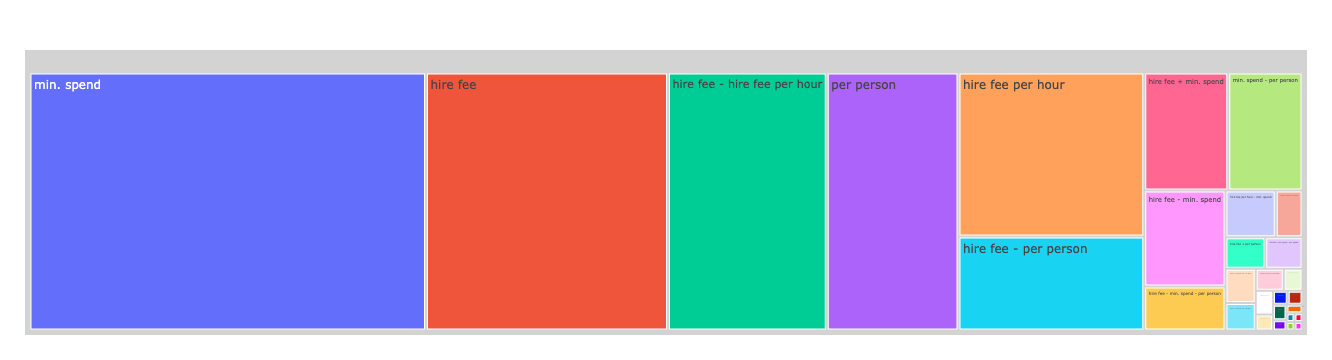

In [94]:
import plotly.express as px
#df = px.data.tips()
fig = px.treemap(df, path=['index'], values='count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [95]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51736 entries, 0 to 51735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   space_url         51736 non-null  object 
 1   venue_url         51736 non-null  object 
 2   venue_name        51736 non-null  object 
 3   space_name        51736 non-null  object 
 4   latitude          51736 non-null  float64
 5   longitude         51736 non-null  float64
 6   day_of_week       51736 non-null  object 
 7   pricing_period    51736 non-null  object 
 8   time_from         51736 non-null  float64
 9   time_to           51736 non-null  float64
 10  time_period       51736 non-null  float64
 11  total_price       51736 non-null  float64
 12  price_type        51736 non-null  object 
 13  rent_price_split  2434 non-null   float64
 14  min_spend_split   0 non-null      float64
 15  per_person_split  2434 non-null   float64
dtypes: float64(9), object(7)
memory usage: 6

In [97]:
def variation(data):
    return np.max(data) - np.min(data)

weekday_pivot = pd.pivot_table(prices, index=['space_url', 'price_type'],
                    columns=['day_of_week'], values = ['total_price'])

weekday_pivot[('total_price','variation')] = weekday_pivot.max(axis = 1) - weekday_pivot.min(axis = 1)
# Remove multi index -> this makes it easier to plot
weekday_pivot = weekday_pivot.reset_index()
weekday_pivot = weekday_pivot.droplevel(axis = 1, level=0)

# Rename columns lost when removing multindex
cols=pd.Series(weekday_pivot.columns)
cols[0] = 'space_url'
cols[1] = 'price_type'
weekday_pivot.columns = cols

weekday_pivot.head(10)

day_of_week,space_url,price_type,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,variation
0,https://www.tagvenue.com/rooms/barnes/7039/the...,per person,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0
1,https://www.tagvenue.com/rooms/barnes/7040/the...,per person,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0
2,https://www.tagvenue.com/rooms/barnes/7041/the...,per person,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0
3,https://www.tagvenue.com/rooms/barnet/8642/go-...,per person,33.0,33.0,33.0,33.0,33.0,33.0,33.0,0.0
4,https://www.tagvenue.com/rooms/bayswater/3062/...,hire fee + min. spend,2000.0,1750.0,2250.0,2250.0,2000.0,1750.0,1750.0,500.0
5,https://www.tagvenue.com/rooms/bayswater/3064/...,min. spend,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.0
6,https://www.tagvenue.com/rooms/brentford/17965...,hire fee,100.0,100.0,NaN,NaN,100.0,100.0,100.0,0.0
7,https://www.tagvenue.com/rooms/brentford/17965...,hire fee per hour,25.0,25.0,NaN,NaN,25.0,25.0,25.0,0.0
8,https://www.tagvenue.com/rooms/brentford/17966...,hire fee,175.0,175.0,NaN,NaN,175.0,175.0,175.0,0.0
9,https://www.tagvenue.com/rooms/brentford/17966...,hire fee per hour,30.0,30.0,NaN,NaN,30.0,30.0,30.0,0.0


In [98]:
no_week_variation = weekday_pivot[weekday_pivot.variation == 0]
num_no_week_variation = no_week_variation.variation.count()
total = weekday_pivot.shape[0]
num_week_variation = total - num_no_week_variation


print(f"{num_no_week_variation} out of {total} spaces do not vary on different weekdays. -> {(num_no_week_variation / total):.0%}")
print(f"{num_week_variation} out of {total} spaces vary on different weekdays.")

4575 out of 6139 spaces do not vary on different weekdays. -> 75%
1564 out of 6139 spaces vary on different weekdays.


Below we breakdown the count of no variation for different price_types:

In [99]:
no_variation_price_type_counts = no_week_variation.price_type.value_counts()
total_price_type_counts = weekday_pivot.price_type.value_counts()


perc_no_variation_per_price_type = no_variation_price_type_counts / total_price_type_counts *100

perc_no_variation_per_price_type

hire fee                 84.205180
min. spend               51.672060
hire fee per hour        83.810376
per person               92.116183
hire fee + min. spend    53.333333
hire fee + per person    91.666667
Name: price_type, dtype: float64

**Observations:**
- hire fee has large majority with no price variation per weekday. 
- min spend has at least 50% with variation per weekday! May be worth including or calculating...separate models? Or add simple average? 

In [101]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [102]:
week_variation = weekday_pivot[weekday_pivot.variation > 0]

# Unpivot weekday prices to make plotting easier 
week_variation = week_variation.melt(id_vars = ['space_url', 'price_type'], 
                    value_vars = weekdays, value_name = 'total_price')

week_variation

,space_url,price_type,day_of_week,total_price
0,https://www.tagvenue.com/rooms/bayswater/3062/...,hire fee + min. spend,Monday,1750.0
1,https://www.tagvenue.com/rooms/brentford/1828/...,hire fee,Monday,280.0
2,https://www.tagvenue.com/rooms/camden/1087/sha...,per person,Monday,50.0
3,https://www.tagvenue.com/rooms/camden/1088/sha...,per person,Monday,50.0
4,https://www.tagvenue.com/rooms/camden/3047/sha...,per person,Monday,50.0
...,...,...,...,...
10943,https://www.tagvenue.com/rooms/surrey/1247/rav...,hire fee per hour,Sunday,350.0
10944,https://www.tagvenue.com/rooms/surrey/1248/rav...,hire fee per hour,Sunday,250.0
10945,https://www.tagvenue.com/rooms/twickenham/1072...,per person,Sunday,70.0
10946,https://www.tagvenue.com/rooms/twickenham/1073...,per person,Sunday,NaN


In [106]:
price_type_order.tolist()

['hire fee',
 'min. spend',
 'hire fee per hour',
 'per person',
 'hire fee + min. spend',
 'hire fee + per person']

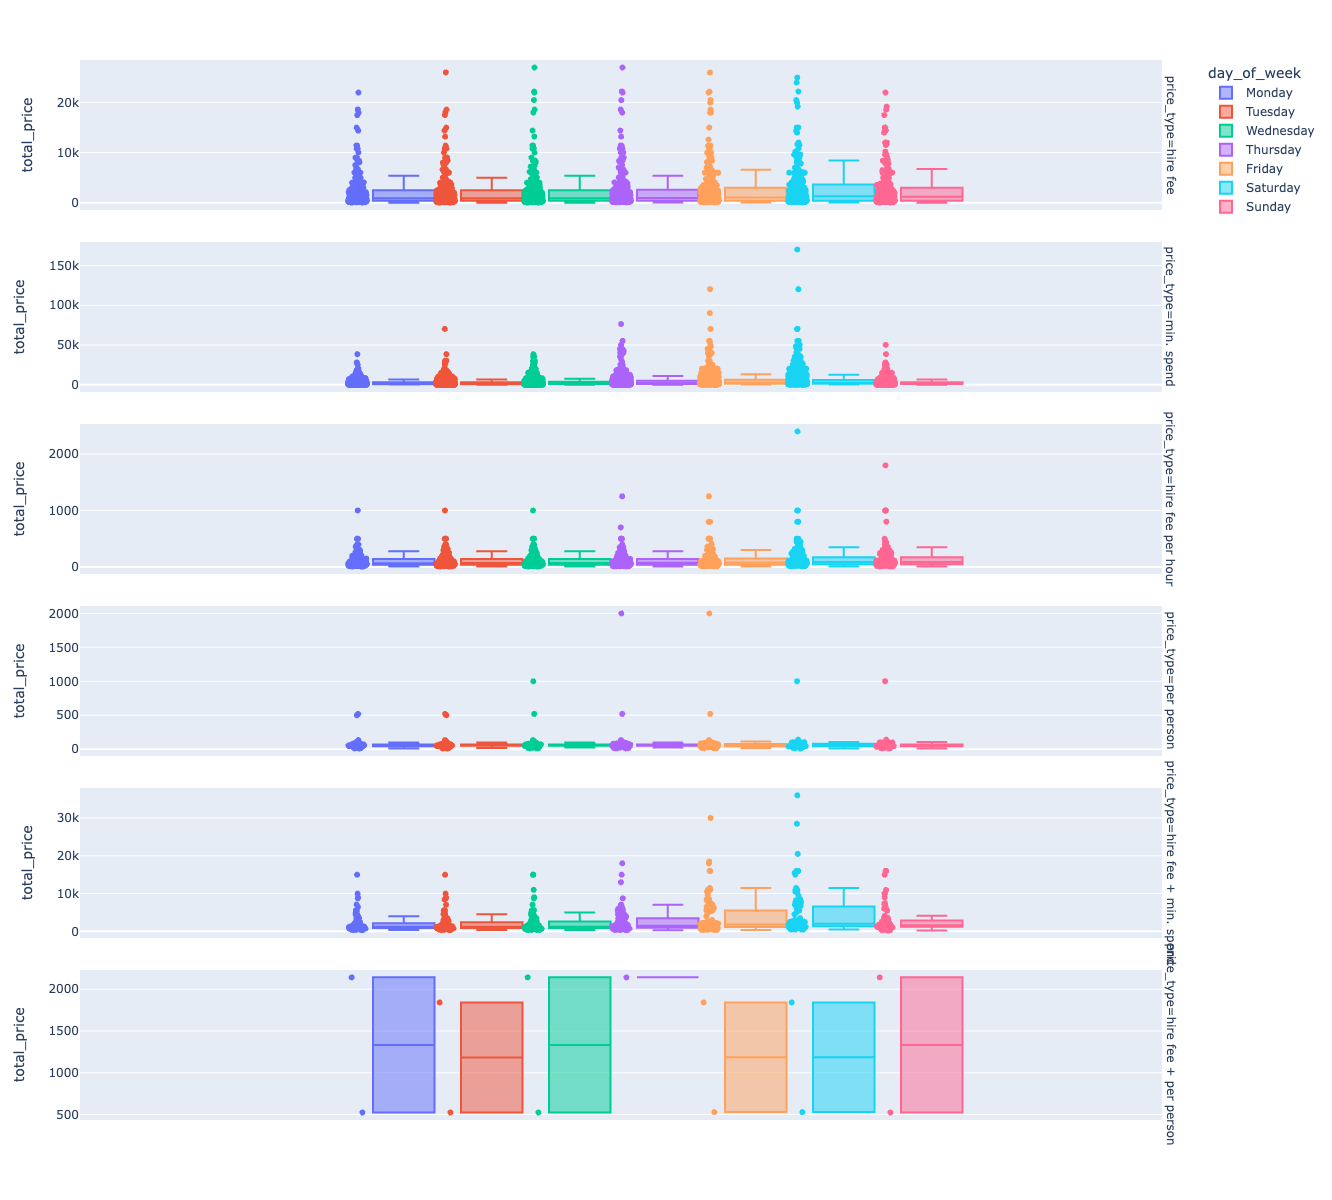

In [108]:
price_type_order = price_types_per_space['price_type'].value_counts().index.tolist()
fig = px.box(week_variation, y="total_price", facet_row="price_type", color="day_of_week", 
             height = 1200, points = 'all', category_orders = {'price_type':price_type_order})


fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

# Need to re-order weekdays to make it more sensible! e.g. Mon to Sunday! 
# Need to re-order facet row to be largest to smallest...e.g. via price_types_per_space['price_type'].value_counts()

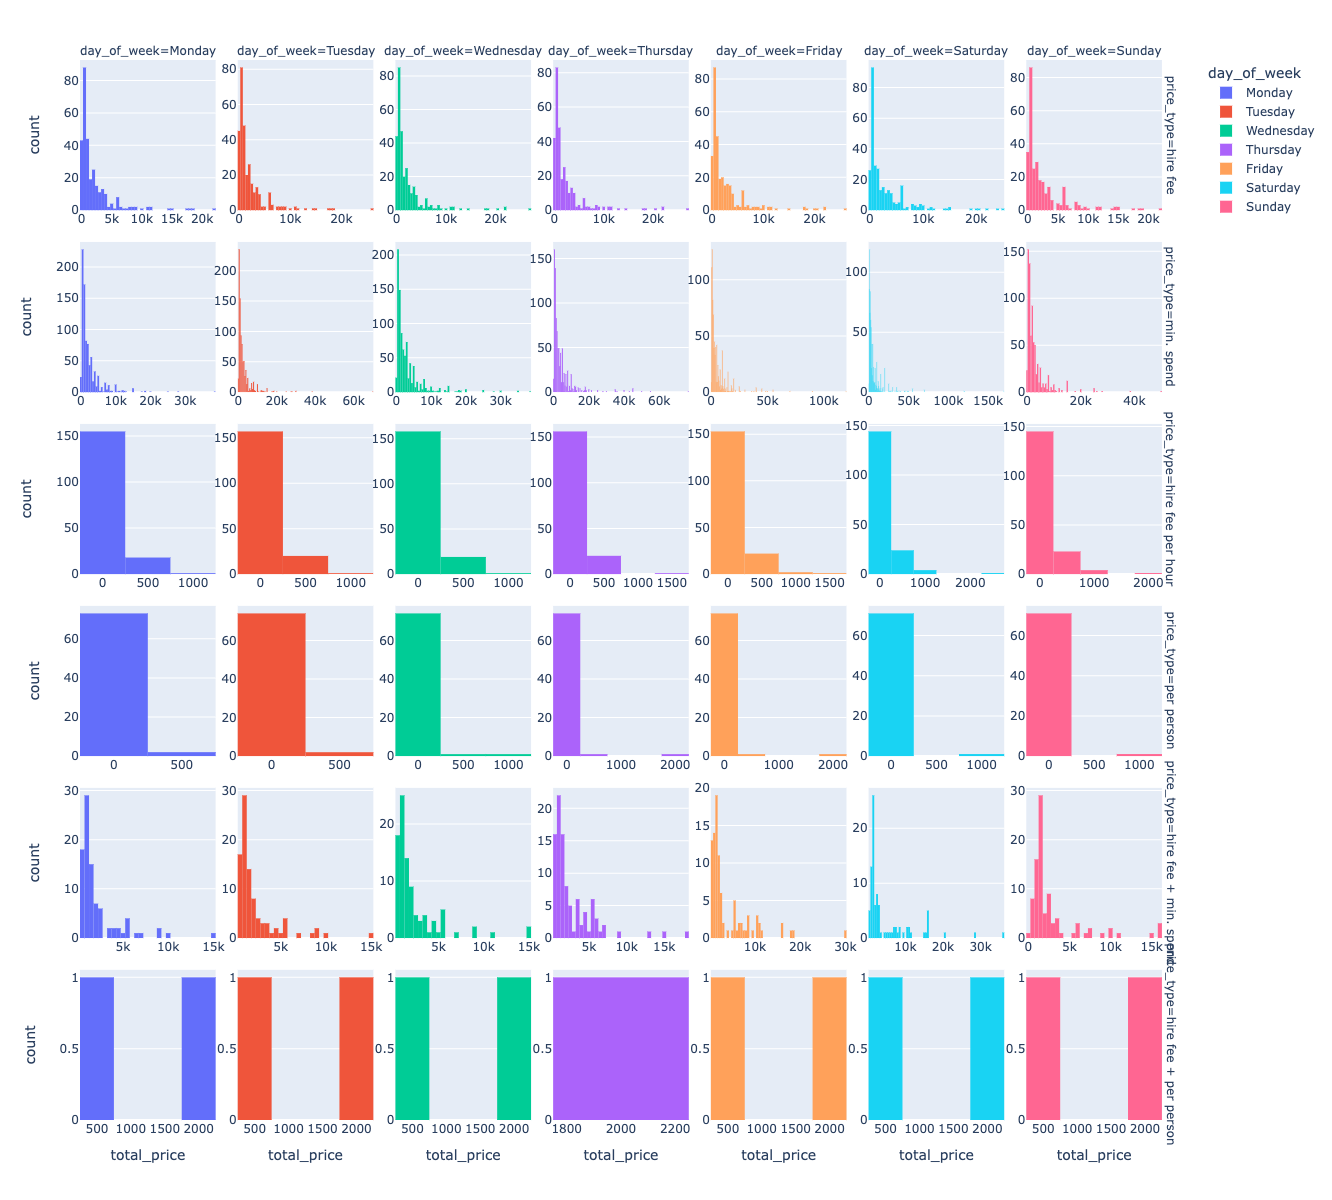

In [111]:
fig = px.histogram(week_variation, x="total_price", facet_row="price_type", 
                   facet_col="day_of_week", color = 'day_of_week', height = 1200, 
                   category_orders = {'price_type':price_type_order})
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_xaxes(matches=None, showticklabels=True)
fig.show()


In [ ]:
no_week_variation.price_type.value_counts()

In [ ]:
import plotly.express as px

fig = px.histogram(weekday_pivot, x = 'variation')
fig.show()

Awesome stuff: 
- properly note / display the median and mean values per weekday for each price type -> use groupby :) -> why median so constant?
- Do ANOVA as minimum to see if significant difference between means...then maybe one by one if you need to...if not significant then not really legit
- Create above plots for % variation i.e. percentage increase over the minimum price...if its roughly constant, then can just add flat percentage, if it isnt...then probably should try to model weekdays included..
- Consider implications e.g. how to treat different days? Maybe I create separate models per weekday? hmmmmmmm what about nans? Models per weekday would propely calcualte relationships of weekday bonus and difeereny areas (i.e. relationship with other variables) so probably better than not...is there enough data? what about the huge amounts of non varying data? Won't that impact things?
- Consider the non variation counts for different price types e.g. hire fee is generally flat but 50% of minimum spend varies...
**possible options**:
  - Ignore weekdays entirely
  - Add average change to price based purely on weekday (dosnt capture bugger incereases in more popular areas...although that may not happen...% increase! 
  - Perform separate model for each week day...but concerned about impact of most not varying...
  - Do combo models, one model of all / just non varying and another of just varying and combine together...would need to google but could be cool... 

**Observations:**
- Mean is approx same for Monday - Wednesday and is higher on from Thursday to Sunday -> Potentially combine into categorical variable of day of week...but what about nans? And what about repeated rows...isnt that a problem? hmmmmm...not sure, need to consider. 
- Median highlights only Sat and Sun in particualar. 

In [ ]:
price_types_per_space['price_type_'] = 1

In [ ]:
table = pd.pivot_table(price_types_per_venue, index=['venue_url'],
                    columns=['price_type'], values = ['v'], margins = True, aggfunc=np.sum)
table

In [ ]:
table.columns

In [ ]:
table[ ('v', 'All')].value_counts()

In [ ]:
table[('v', 'All')].values[0:-1]

In [ ]:
table.columns

In [ ]:
2560/1741

- repeat analysis per space
- run week analysis -> could do something similar to above? or not? How stable are prices and price_types?  

In [ ]:
table

In [ ]:
# Total spaces
venues.shape

In [ ]:
# Price options total
price_types_per_venue.shape

In [ ]:
# Unique Venues
venues.venue_url.drop_duplicates().count()

In [ ]:
2560 - 1739

## Options: 
- Regress min.spend and hire fee etc. separately...
- Somehow convert...

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
matrix = test.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()


In [ ]:
import pandas as pd
data = [[5,0,1,0,0,1], [6,1,0,1,0,0], [3,1,0,0,1,0], [2,0,1,0,0,1], [4,1,0,1,0,0], [1,1,0,0,1,0], [7,0,1,0,0,1], [9,1,0,1,0,0], [2,1,0,0,1,0], [7,0,1,0,0,1], [6,1,0,1,0,0], [2,1,0,0,1,0]]

test = pd.DataFrame(data, columns = ['y','a','b','c','d','e'])

In [ ]:
y = test['y']
x = test.loc[:,'c':'d']

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x,y)


In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
ols.score(x,y)

In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
ols.score(x,y)

In [ ]:
ols.predict(np.array([1,0,1,0,0]).reshape(1,-1))

In [ ]:
ols.predict(np.array([1,0]).reshape(1,-1))

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
clf.score(x,y)

In [ ]:
from sklearn.linear_model import Ridge



In [ ]:
y = test['y']
x = test.loc[:,'a':'d']

In [ ]:
from sklearn.linear_model import LinearRegression
rid = Ridge(alpha = 1)
rid.fit(x,y)


In [ ]:
rid.coef_

In [ ]:
rid.intercept_

In [ ]:
rid.score(x,y)

In [ ]:
y = test['y']
x = test.loc[:,'a':'c']

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x,y)


In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
ols.score(x,y)

In [ ]:
venues.info()

Interpretation: 

remianing columns questions: 
- What does nan mean? Should I replace it? 
- How many True / False / nan? Even worth keeping? 
- combine with anything else? 

- for parking - combine 3 together! 

In [ ]:
venues.head()

In [ ]:
venues[venues['Halal menu'].isnull()].space_url

In [ ]:
venues.info(verbose = True)

Cleaning to do: 
- compare difference in null values between the 2 standing_max columns 
- combine parking into 1 column
- combine alcohol licenses (one outside the bunch) to a single column and check adds to 1 i.e. OHE / mutually exclusive and got all (there shouldnt be a null value...) 
- test adds up to 1 on mutually exclusive / OHE type ones 